# 航空宇宙情報システム学第二： 4月18日課題 (HW2023-01)

3×3のマス目があり、0から8の番号が付いています。最初、駒は9つのマスのいずれかに等確率でランダムに置かれるとします。その後、各時刻ごとに次の<font color='blue'>[移動規則]</font>に従ってランダムに移動します。十分に時間が経過したとき、各マスに居る確率を求めてください。

<font color='blue'>[移動規則]</font> <p>
* 角のマス(0,2,6,8)に居る時は、確率1/3ずつで隣のマスに移動するか現在のマスに留まる。
* 辺のマス(1,3,5,7)に居る時は、確率1/4ずつで隣のマスに移動するか現在のマスに留まる。
* 真ん中のマス(4)に居る時は、確率1/5ずつで隣のマスに移動するか現在のマスに留まる。

ファイル名は、HW2023-01.ipynb のまま提出して構いません。

提出期限は、<font color='red'>2週間後の5月2日8時30分 (次々回授業の直前) </font>とします。


## 課題補足

各マス間の遷移確率を図示すると、↓のようになります。


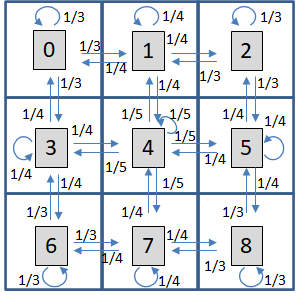


また、遷移行列 $\boldsymbol{T}$は、
$$
\boldsymbol{T} =
\left[ \begin{array}{ccccccccc}
1/3 & 1/4 & 0 & 1/4 & 0 & 0 & 0 & 0 & 0\\
1/3 & 1/4 & 1/3 & 0 & 1/5 & 0 & 0 & 0 & 0\\
0 & 1/4 & 1/3 & 0 & 0 & 1/4 & 0 & 0 & 0\\
1/3 & 0 & 0 & 1/4 & 1/5 & 0 & 1/3 & 0 & 0\\
0 & 1/4 & 0 & 1/4 & 1/5 & 1/4 & 0 & 1/4 & 0\\
0 & 0 & 1/3 & 0 & 1/5 & 1/4 & 0 & 0 & 1/3\\
0 & 0 & 0 & 1/4 & 0 & 0 & 1/3 & 1/4 & 0\\
0 & 0 & 0 & 0 & 1/5 & 0 & 1/3 & 1/4 & 1/3\\
0 & 0 & 0 & 0 & 0 & 1/4 & 0 & 1/4 & 1/3\\
\end{array}
  \right]
$$

のようになります。

このとき、時刻 $t$ において、各マスに存在する確率をベクトル
$\boldsymbol{p}_t$で表すと、
$$
\boldsymbol{p}_{t+1} = \boldsymbol{T} \boldsymbol{p}_t
$$
が成り立ちます。

ただし、最初の時刻は全てのマス目に等確率に居るとするので、確率ベクトル $\boldsymbol{p}_0$は、
$$
\boldsymbol{p}_0 = \left[ \begin{array}{ccccccccc}
1/9 & 1/9 & 1/9 & 1/9 & 1/9 & 1/9 & 1/9 & 1/9 & 1/9 \\
\end{array}
  \right]^\top
$$
と表されます。

「十分に時間が経った時に各マスにコマが居る確率」は、
$$\boldsymbol{p}_{\infty} = \lim_{t \rightarrow \infty} \boldsymbol{p}_{t}$$

ということになります。

## ヒント

この問題はいくつか解き方が考えられます。

1. 確率遷移の式に従って、$\boldsymbol{p}_t$ が定常になるまで計算する。

2. 定常状態では、 $\boldsymbol{p}_{\infty}=\boldsymbol{T} \boldsymbol{p}_{\infty}$ になることを利用して、固有値・固有ベクトルから求める。
$\boldsymbol{T}$ の最大固有値(=1)に対応する
固有ベクトルが $\boldsymbol{p}_{\infty}$ です。
`numpy.linalg.eig` 関数を使っても良いですが、固有値が1であると分かっている
ので、1次の連立方程式を求めて `numpy.linalg.solve`関数を使っても固有ベクトルを
計算できます（ただし少し工夫は必要）。

3. 移動規則に従って、多数のランダムシミュレーションを行い、ヒストグラム（頻度）を計算して求める。一種のモンテカルロ法になります。（さらに難しい話をすると、「多数」のシミュレーションを行う代わりに、1回の非常に長い
シミュレーションを行って、ヒストグラムを計算しても良いです。（マルコフ連鎖モンテカルロ(MCMC)法と呼ばれています。））

とりあえず、1をやってみて、余裕のある人は、2, 3 のやり方も試してみてください。
（例年この時期は「課題が多過ぎる」という声を聞くので、無理しなくても結構です。）

**(発展)**

- $9\times 9$ の遷移行列$\boldsymbol{T}$を`np.array()`で作る際に、要素の値を愚直に与えるのは大変です。要領良く$\boldsymbol{T}$を作る方法を考えてみてください。
- matplotlib を使える人は、棒グラフ（ヒストグラム）や
ヒートマップを書いてみると結果のイメージが掴めると
思います。

_____

______

# 解法１(定常になるまで繰り返す)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
arrayT = np.zeros([9, 9])

for i in range(len(arrayT[0])):
    if i == 0:
        arrayT[i][0] = 1/3
        arrayT[i][1] = 1/3
        arrayT[i][3] = 1/3
    elif i == 1:
        arrayT[i][0] = 1/4
        arrayT[i][1] = 1/4
        arrayT[i][2] = 1/4
        arrayT[i][4] = 1/4
    elif i == 2:
        arrayT[i][1] = 1/3
        arrayT[i][2] = 1/3
        arrayT[i][5] = 1/3
    elif i == 3:
        arrayT[i][0] = 1/4
        arrayT[i][3] = 1/4
        arrayT[i][4] = 1/4
        arrayT[i][6] = 1/4
    elif i == 4:
        arrayT[i][1] = 1/5
        arrayT[i][3] = 1/5
        arrayT[i][4] = 1/5
        arrayT[i][5] = 1/5
        arrayT[i][7] = 1/5
    elif i == 5:
        arrayT[i][2] = 1/4
        arrayT[i][4] = 1/4
        arrayT[i][5] = 1/4
        arrayT[i][8] = 1/4
    elif i == 6:
        arrayT[i][3] = 1/3
        arrayT[i][6] = 1/3
        arrayT[i][7] = 1/3
    elif i == 7:
        arrayT[i][4] = 1/4
        arrayT[i][6] = 1/4
        arrayT[i][7] = 1/4
        arrayT[i][8] = 1/4
    else:
        arrayT[i][5] = 1/3
        arrayT[i][7] = 1/3
        arrayT[i][8] = 1/3

arrayT = np.mat(arrayT.T)
# arrayT = arrayT.T
arrayT


matrix([[0.33333333, 0.25      , 0.        , 0.25      , 0.        ,
         0.        , 0.        , 0.        , 0.        ],
        [0.33333333, 0.25      , 0.33333333, 0.        , 0.2       ,
         0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.25      , 0.33333333, 0.        , 0.        ,
         0.25      , 0.        , 0.        , 0.        ],
        [0.33333333, 0.        , 0.        , 0.25      , 0.2       ,
         0.        , 0.33333333, 0.        , 0.        ],
        [0.        , 0.25      , 0.        , 0.25      , 0.2       ,
         0.25      , 0.        , 0.25      , 0.        ],
        [0.        , 0.        , 0.33333333, 0.        , 0.2       ,
         0.25      , 0.        , 0.        , 0.33333333],
        [0.        , 0.        , 0.        , 0.25      , 0.        ,
         0.        , 0.33333333, 0.25      , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.2       ,
         0.        , 0.33333333, 0.25     

In [ ]:
p0 = np.full([9,1],1/9)
p0 = np.mat(p0)
p0

matrix([[0.11111111],
        [0.11111111],
        [0.11111111],
        [0.11111111],
        [0.11111111],
        [0.11111111],
        [0.11111111],
        [0.11111111],
        [0.11111111]])

In [ ]:
while True:
    p0dash = np.dot(arrayT, p0)
    if np.all(p0dash - p0 != np.zeros([9, 1])):
        p0 = p0dash
    else:
        break

p0 = p0.reshape(3,3)
p0

matrix([[0.09090909, 0.12121212, 0.09090909],
        [0.12121212, 0.15151515, 0.12121212],
        [0.09090909, 0.12121212, 0.09090909]])

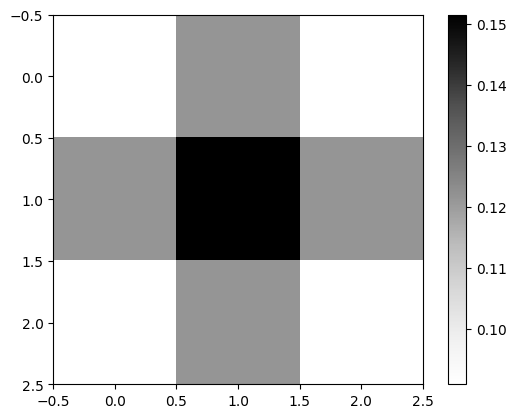

In [ ]:
fig, ax = plt.subplots()
im = ax.imshow(p0, cmap = 'Greys')
fig.colorbar(im)
plt.show()

_________

# 解法２(固有ベクトル)

In [ ]:
import sympy

In [ ]:
# ms = sympy.Matrix(arrayT)
# p0 = ms.eigenvects()[1][2][0]
# p0 = sympy.matrix2numpy(p0).astype(float)
# p0 = p0.reshape(3,3)
# p0

In [ ]:
#numpyを使用

np.linalg.eig(arrayT)

(array([-0.46666667,  1.        ,  0.33333333,  0.25      , -0.11870241,
         0.70203574,  0.70203574, -0.11870241,  0.25      ]),
 matrix([[ 2.23606798e-01, -2.68328157e-01,  5.00000000e-01,
           2.56307297e-01,  4.35632427e-01, -4.89405065e-01,
           2.85790408e-01, -3.22801350e-02,  8.90816071e-02],
         [-3.57770876e-01, -3.57770876e-01, -2.36777010e-16,
          -4.27178829e-02, -3.93842855e-01, -3.60889652e-01,
          -8.22220224e-02,  4.21943673e-01, -4.83676210e-01],
         [ 2.23606798e-01, -2.68328157e-01, -5.00000000e-01,
           2.56307297e-01,  1.38569293e-17, -1.38166638e-17,
          -3.97292286e-01, -4.34434810e-01,  8.90816071e-02],
         [-3.57770876e-01, -3.57770876e-01, -2.99154210e-16,
          -4.27178829e-02, -3.93842855e-01, -3.60889652e-01,
           5.03708469e-01, -3.63576574e-01,  4.53982341e-01],
         [ 5.36656315e-01, -4.47213595e-01,  3.98248485e-16,
          -8.54357658e-01,  3.94791973e-17, -5.69523006e-16,
       

In [ ]:
ar = np.linalg.eig(arrayT)[0]
ma = np.linalg.eig(arrayT)[1].T
p0 = ma[np.argmax(ar)]
def Div(n):
  return n/np.sum(p0)
p0 = list(map(Div,p0))[0].reshape(3,3)
p0

matrix([[0.09090909, 0.12121212, 0.09090909],
        [0.12121212, 0.15151515, 0.12121212],
        [0.09090909, 0.12121212, 0.09090909]])

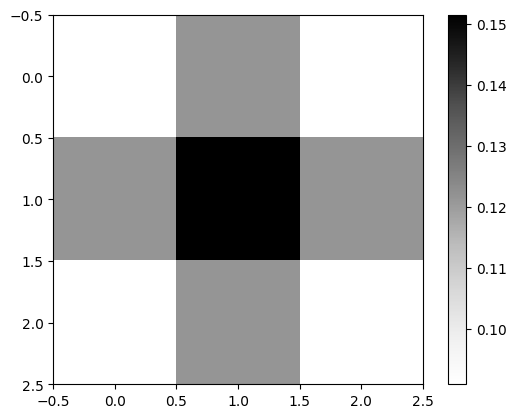

In [ ]:
fig, ax = plt.subplots()
im = ax.imshow(p0, cmap = 'Greys')
fig.colorbar(im)
plt.show()

______

# 解法３(モンテカルロ法)

In [ ]:
import random

In [ ]:
#移動規則

def rule(steps):
    cur = random.randint(0, 8)
    for i in range(steps):
        if cur == 0:
            p = random.randint(0, 2)
            if p == 0:
                cur = 0
            elif p == 1:
                cur = 1
            else:
                cur = 3
            continue

        elif cur == 1:
            p = random.randint(0, 3)
            if p == 0:
                cur = 0
            elif p == 1:
                cur = 1
            elif p == 2:
                cur = 2
            else:
                cur = 4
            continue

        elif cur == 2:
            p = random.randint(0, 2)
            if p == 0:
                cur = 1
            elif p == 1:
                cur = 2
            else:
                cur = 5
            continue

        elif cur == 3:
            p = random.randint(0, 3)
            if p == 0:
                cur = 0
            elif p == 1:
                cur = 3
            elif p == 2:
                cur = 4
            else:
                cur = 6
            continue

        elif cur == 4:
            p = random.randint(0, 4)
            if p == 0:
                cur = 1
            elif p == 1:
                cur = 3
            elif p == 2:
                cur = 4
            elif p == 3:
                cur = 5
            else:
                cur = 7
            continue

        elif cur == 5:
            p = random.randint(0, 3)
            if p == 0:
                cur = 2
            elif p == 1:
                cur = 4
            elif p == 2:
                cur = 5
            else:
                cur = 8
            continue

        elif cur == 6:
            p = random.randint(0, 2)
            if p == 0:
                cur = 3
            elif p == 1:
                cur = 6
            else:
                cur = 7
            continue

        elif cur == 7:
            p = random.randint(0, 3)
            if p == 0:
                cur = 4
            elif p == 1:
                cur = 6
            elif p == 2:
                cur = 7
            else:
                cur = 8
            continue

        else:
            p = random.randint(0, 2)
            if p == 0:
                cur = 5
            elif p == 1:
                cur = 7
            else:
                cur = 8
            continue
    return cur

In [ ]:
#シミュレーション実行関数

def mc(steps, count):
    data = []
    for i in range(count):
        data.append(rule(steps))

    map = []
    for i in range(9):
        map.append(data.count(i))
    m_array = np.array(map).reshape(3, 3)

    return m_array


[[ 842 1288  860]
 [1206 1542 1247]
 [ 870 1235  910]]


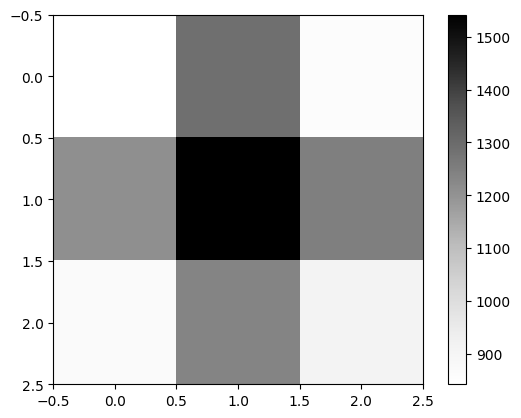

In [ ]:
result = mc(1000,10000)
print(result)
fig, ax = plt.subplots()
im = ax.imshow(result, cmap = 'Greys')
fig.colorbar(im)
plt.show()

____

# 解法３　別解(MCMC法)

In [ ]:
#移動規則

def rule(cur):
    if cur == 0:
        p = random.randint(0, 2)
        if p == 0:
            cur = 0
        elif p == 1:
            cur = 1
        else:
            cur = 3
        return cur

    elif cur == 1:
        p = random.randint(0, 3)
        if p == 0:
            cur = 0
        elif p == 1:
            cur = 1
        elif p == 2:
            cur = 2
        else:
            cur = 4
        return cur

    elif cur == 2:
        p = random.randint(0, 2)
        if p == 0:
            cur = 1
        elif p == 1:
            cur = 2
        else:
            cur = 5
        return cur

    elif cur == 3:
        p = random.randint(0, 3)
        if p == 0:
            cur = 0
        elif p == 1:
            cur = 3
        elif p == 2:
            cur = 4
        else:
            cur = 6
        return cur

    elif cur == 4:
        p = random.randint(0, 4)
        if p == 0:
            cur = 1
        elif p == 1:
            cur = 3
        elif p == 2:
            cur = 4
        elif p == 3:
            cur = 5
        else:
            cur = 7
        return cur

    elif cur == 5:
        p = random.randint(0, 3)
        if p == 0:
            cur = 2
        elif p == 1:
            cur = 4
        elif p == 2:
            cur = 5
        else:
            cur = 8
        return cur

    elif cur == 6:
        p = random.randint(0, 2)
        if p == 0:
            cur = 3
        elif p == 1:
            cur = 6
        else:
            cur = 7
        return cur

    elif cur == 7:
        p = random.randint(0, 3)
        if p == 0:
            cur = 4
        elif p == 1:
            cur = 6
        elif p == 2:
            cur = 7
        else:
            cur = 8
        return cur

    else:
        p = random.randint(0, 2)
        if p == 0:
            cur = 5
        elif p == 1:
            cur = 7
        else:
            cur = 8
        return cur

In [ ]:
#シミュレーション実行関数

def mc(steps):
    data = []
    cur = random.randint(0, 8)
    for i in range(steps):
        cur = rule(cur)
        data.append(cur)

    map = []
    for i in range(9):
        map.append(data.count(i))
    m_array = np.array(map).reshape(3, 3)

    return m_array



[[ 9226 12274  8916]
 [12124 15059 11943]
 [ 9048 12161  9249]]


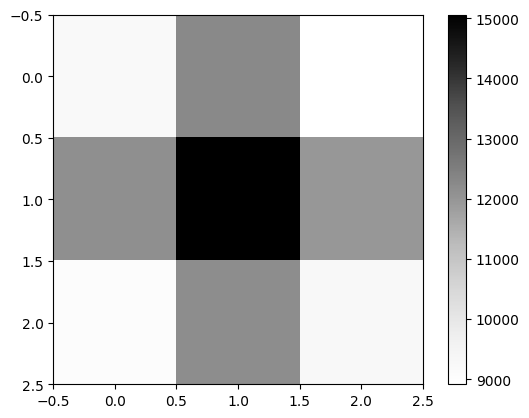

In [ ]:
result = mc(100000)
print(result)
fig, ax = plt.subplots()
im = ax.imshow(result, cmap = 'Greys')
fig.colorbar(im)
plt.show()